# **Tarea Nº 4**
Scope: APIs

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Viernes 12 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Elías Gómez y Gustavo Torres ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

The Central Bank Reserve of Perú (BCRP) holds a list of datasets that are among the most comprehensive for macroeconomic purposes. In this exercise, we'll retrieve data from the [BCRP API](https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api) and explore the impact of pandemics

## Before starting

- You must pull the necessary data using `get` and `requests`
- You are required to apply the concepts learned in the previous sessions (`pandas`, `if`, `loop`, `function`)
- Hint: here is the BCRP url structure for the APIs call:
```html
https://estadisticas.bcrp.gob.pe/estadisticas/series/api/[códigos de series]/[formato de salida]/[periodo inicial]/[periodo final]/[idioma]
```

## The very long run

1. Locate the "Estadísticas de 100 años del BCRP" section in the BCRP´s series data statistics [here](https://estadisticas.bcrp.gob.pe/estadisticas/series/index) and identify the necessary code for the serie **`PBI (Mill S/ 2007)`**. Later, add manually the annual GDP values for 2022 and 2023 (be careful with the units of data). Then, **calculate** the Peruvian annual GDP growth (%) since 1922 to 2023. Finally, plot it using a very simple graph through `matplotlib` and provide critical insights (no more than 100 words)

    Hint1: use `.json()` for exploring the `content`. Your data is inside `["periods"]`
    
    Hint2: the graph must looks something like this: <img src="growth_gdp_long_run.png" max-width="300">
    

In [34]:
import requests
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.api as sm

{'config': {'title': 'PBI Sectorial', 'series': [{'name': 'PBI Sectorial - PBI (Mill S/ 2007)', 'dec': '0'}]}, 'periods': [{'name': '1922', 'values': ['14122.0322219965']}, {'name': '1923', 'values': ['14756.217373401']}, {'name': '1924', 'values': ['16069.7988061845']}, {'name': '1925', 'values': ['16575.1994730273']}, {'name': '1926', 'values': ['18130.1930941889']}, {'name': '1927', 'values': ['18686.5803772776']}, {'name': '1928', 'values': ['19690.2907641301']}, {'name': '1929', 'values': ['22169.3361005263']}, {'name': '1930', 'values': ['20064.6268356107']}, {'name': '1931', 'values': ['18739.2107900484']}, {'name': '1932', 'values': ['18130.0703142981']}, {'name': '1933', 'values': ['20080.8982502038']}, {'name': '1934', 'values': ['22631.9919031546']}, {'name': '1935', 'values': ['24635.4496176484']}, {'name': '1936', 'values': ['25821.4863767546']}, {'name': '1937', 'values': ['26321.8856838524']}, {'name': '1938', 'values': ['26849.8971141138']}, {'name': '1939', 'values': [

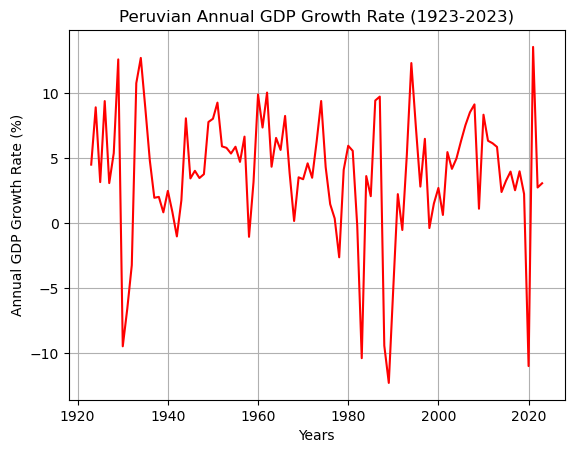

In [25]:
# Solution
PBI_BCRP=requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD39563DA/json/1922/2021/esp")
data = PBI_BCRP.json()

# Manually add GDP values for 2022 and 2023
data['periods'].append({'name': '2022', 'values': ['567390.123467761']})
data['periods'].append({'name': '2023', 'values': ['584723']})
print(data)

# Calculate annual GDP growth (%)
gdp_values = [float(period['values'][0]) for period in data['periods']]
annual_growth_rates = [(gdp_values[i] / gdp_values[i - 1] - 1) * 100 for i in range(1, len(gdp_values))]

# Print the annual growth rates
print("Annual GDP Growth Rates (%):", annual_growth_rates)

# Plot the annual GDP growth rates
years = [int(period['name']) for period in data['periods'][1:]]  # Exclude 1922 as there's no growth rate for it
plt.plot(years, annual_growth_rates, linestyle='-', color='r')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Annual GDP Growth Rate (%)')
plt.title('Peruvian Annual GDP Growth Rate (1923-2023)')

# Show the plot
plt.grid(True)
plt.show()



En el gráfico podemos apreciar los periodos de expansión y contracción de la economía peruana, entre los años 1923-2023. POr ejemplo se puede apreciar los picos contractivos en los años 1980 y 2021 debido a la hiperinflación del primer gobierno de Alan García y el comienzo de la cuarentena en el país, respectivamente. El análisis de estas tendencias puede ayudar a comprender mejor la resistencia y vulnerabilidad económicas del país, así como la eficacia de las distintas estrategias económicas a lo largo del siglo pasado.  

## The hitman

2. Retrieve the up-to-date data for the monthly GDP in index (2007=100) from this [link](https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/producto-bruto-interno-y-demanda-interna-variaciones-indice-2007). Then, calculate the the 5-year average monthly growth previous to the pandemics (ending in Feb-2020) for the 12-month rolling mean of the index, and project the alternative scenario of the Peruvian economy without the COVID-19. Then plot them out and provide insight from the gap between the real data and the pre-pandemic trend.

    Hint1: You may use the regression type of your election, but the OLS is recommended. 
    
    Hint2: Your plot should look somethig like this. You aren´t required to add flags/annotations/texts inside the graph <img src="growth_gdp_pandemics.png" max-width="300">

    Hint3: For more details about calculation, review this post from [The Economist](https://www.economist.com/graphic-detail/2021/10/28/americas-post-covid-economic-recovery-suffers-a-setback)
    


In [53]:
# Solution
PBI_BCRP_month=requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01770AM/json/2003-1/2023-10")
data_month = PBI_BCRP_month.json()
print(data_month)

# Si es diferente, ajusta el código en consecuencia.
df = pd.DataFrame(data_month['periods'])

# Convertir la columna 'values' a numérica si es necesario
df['values'] = pd.to_numeric(df['values'], errors='coerce')

# Filtrar datos hasta febrero de 2020
pre_pandemic_data = df[df['name'] <= '2020-02']

# Calcular la media móvil de 12 meses
pre_pandemic_data['rolling_mean'] = pre_pandemic_data['values'].rolling(window=12).mean()

# Calcular el crecimiento promedio mensual de 5 años antes de la pandemia
average_growth = pre_pandemic_data['rolling_mean'].pct_change().mean() * 100

# Proyectar un escenario alternativo sin COVID-19
months_to_project = 12  # Puedes ajustar según sea necesario
projected_data = pre_pandemic_data.copy()

for i in range(months_to_project):
    last_row = projected_data.iloc[-1]
    projected_value = last_row['values'] * (1 + average_growth / 100)
    projected_data = projected_data.append({'name': last_row['name'] + pd.DateOffset(months=1), 'values': projected_value}, ignore_index=True)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(df['name'], df['values'], label='Real Data')
plt.plot(pre_pandemic_data['name'], pre_pandemic_data['rolling_mean'], label='Pre-pandemic Trend')
plt.plot(projected_data['name'], projected_data['values'], label='Projected Scenario', linestyle='dashed')

plt.title('Peruvian Economy: Real Data vs Pre-pandemic Trend vs Projected Scenario')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.show()

{'config': {'title': 'Producto bruto interno y demanda interna (índice 2007=100)', 'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - PBI', 'dec': '1'}]}, 'periods': [{'name': 'Ene.2003', 'values': ['73.2223697356532']}, {'name': 'Feb.2003', 'values': ['71.079432278923']}, {'name': 'Mar.2003', 'values': ['74.3427231053258']}, {'name': 'Abr.2003', 'values': ['80.6677115046248']}, {'name': 'May.2003', 'values': ['83.222645844011']}, {'name': 'Jun.2003', 'values': ['80.853774469805']}, {'name': 'Jul.2003', 'values': ['79.2070171390158']}, {'name': 'Ago.2003', 'values': ['74.2120138543618']}, {'name': 'Sep.2003', 'values': ['73.8678353680876']}, {'name': 'Oct.2003', 'values': ['77.5989135108107']}, {'name': 'Nov.2003', 'values': ['75.5725386288336']}, {'name': 'Dic.2003', 'values': ['78.0097324133558']}, {'name': 'Ene.2004', 'values': ['75.9132669251778']}, {'name': 'Feb.2004', 'values': ['74.0974359154403']}, {'name': 'Mar.2004', 'values': ['78.6354629791467

IndexError: single positional indexer is out-of-bounds

## The winners

- Based on the [Nasdaq Stock Screener](https://www.nasdaq.com/market-activity/stocks/screener), identify the three largest companies in the three larger sectors defined by market cap
- Elaborate a list/dictionary/series (what ever you think is more suitable) containing all tickers (or symbols) and sectors from these companies.
- So far, you can download data from Nasdaq, web scrape it or copy it manually. It doesn´t matter
- Then, use `yfinance` library to retrieve the market data for all the 9 firms
- Construct a table with the most common *institucional holders* by sector. Is there any interesting pattern? Hint: loop the `institutional_holders` from `yfinance`
- Calculate the distribution of the daily percentage returns for the 3 larger companies (defined by market cap) along the last 5 years. Plot your results (feel free to find the most appealing way to represent them) and provide critical insights

$$
  percentage\_return_{t} = \frac{price_t-price_{t-1}}{price_t}*100+dividends (\%)
$$

- Hint1: you can find the `dividens` through the `yfinance`'s 
`Ticker()`
- Hint2: some firms may not be paying dividends

In [ ]:
# Solution